In [15]:
import pandas as pd

In [16]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv("data.txt",sep=';')

C:\Users\nagrimault\AppData\Local\Temp\ipykernel_8652\4233321427.py:4: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.txt",sep=';')


In [17]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,0,0,0,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,0,0,0,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,0,0,0,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,0,0,0,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,"3,769090654336556E-3","8,5863334286662614","1,1922637097134124E-3","45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ZIBZIN                    object
 1   IDAvisAutorisationCheque  object
 2   FlagImpaye                object
 3   Montant                   object
 4   DateTransaction           object
 5   CodeDecision              object
 6   VerifianceCPT1            object
 7   VerifianceCPT2            object
 8   VerifianceCPT3            object
 9   D2CB                      object
 10  ScoringFP1                object
 11  ScoringFP2                object
 12  ScoringFP3                object
 13  TauxImpNb_RB              object
 14  TauxImpNB_CPM             object
 15  EcartNumCheq              object
 16  NbrMagasin3J              object
 17  DiffDateTr1               object
 18  DiffDateTr2               object
 19  DiffDateTr3               object
 20  CA3TRetMtt                object
 21  CA3TR   

In [19]:
df['Montant'] = df['Montant'].str.replace(',','.') 

# Liste des colonnes à convertir en numérique
numeric_cols = ['VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1',
                'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq',
                'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3', 'CA3TRetMtt', 'CA3TR', 'Montant']

# Convertir les colonnes en types numériques
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ZIBZIN                    object 
 1   IDAvisAutorisationCheque  object 
 2   FlagImpaye                object 
 3   Montant                   float64
 4   DateTransaction           object 
 5   CodeDecision              object 
 6   VerifianceCPT1            float64
 7   VerifianceCPT2            float64
 8   VerifianceCPT3            float64
 9   D2CB                      float64
 10  ScoringFP1                float64
 11  ScoringFP2                float64
 12  ScoringFP3                float64
 13  TauxImpNb_RB              float64
 14  TauxImpNB_CPM             float64
 15  EcartNumCheq              float64
 16  NbrMagasin3J              float64
 17  DiffDateTr1               float64
 18  DiffDateTr2               float64
 19  DiffDateTr3               float64
 20  CA3TRetMtt              

In [21]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Créez de nouvelles colonnes pour le jour, le mois et l'année, ainsi que l'heure, la minute et la seconde
df['Jour'] = df['DateTransaction'].dt.day
df['Jour'] = df['Jour'].fillna(0).astype(int)
df['Mois'] = df['DateTransaction'].dt.month
df['Mois'] = df['Mois'].fillna(0).astype(int)
df['Année'] = df['DateTransaction'].dt.year
df['Année'] = df['Année'].fillna(0).astype(int)
df['Heure2'] = df['DateTransaction'].dt.hour
df['Heure2'] = df['Heure2'].fillna(0).astype(int)
df['Minute'] = df['DateTransaction'].dt.minute
df['Minute'] = df['Minute'].fillna(0).astype(int)
df['Seconde'] = df['DateTransaction'].dt.second
df['Seconde'] = df['Seconde'].fillna(0).astype(int)

# Créez une nouvelle colonne 'Date' en combinant les composants jour, mois et année
df['Date'] = df['DateTransaction'].dt.date
df['Heures'] = pd.to_datetime(df[['Heure2', 'Minute', 'Seconde']].astype(str).agg(':'.join, axis=1), format='%H:%M:%S')
df['Heures'] = df['Heures'].dt.time

# Supprimez la colonne originale 'DateTransaction' si vous ne souhaitez plus la conserver
df = df.drop(['DateTransaction'], axis=1)


In [22]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,Date,Heures
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,4.0,4.0,4.0,20.0,0.0,27134,1,2,2017,7,32,14,2017-02-01,07:32:14
1,A013011306908024927155000,78643045,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,NaN,NaN,1.0,2.0,NaN,4.0,4.0,NaN,NaN,27817,1,2,2017,7,43,37,2017-02-01,07:43:37
2,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,4.0,4.0,4.0,NaN,0.0,28058,1,2,2017,7,47,38,2017-02-01,07:47:38
3,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,4.0,4.0,4.0,NaN,0.0,28128,1,2,2017,7,48,48,2017-02-01,07:48:48
4,A013010041908000125652029,78643048,0,26.90,1,0.0,0.0,0.0,549.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,4.0,4.0,NaN,NaN,29607,1,2,2017,8,13,27,2017-02-01,08:13:27


In [23]:
df.describe()

,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Jour,Mois,Année,Heure2,Minute,Seconde
count,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,700541.000000,678108.0,678120.0,89626.000000,206751.0,4.646773e+06,4.646773e+06,4.068207e+06,4.558366e+06,4.629780e+06,338261.000000,4.108757e+06,4.646774e+06,4.646774e+06,4.646774e+06,4.646774e+06,4.646774e+06,4.646774e+06
mean,6.014214e+01,2.295272e-01,2.452963e-01,2.716444e-01,3.139046e+02,3.871919,0.0,0.0,16.962712,0.0,8.480311e+03,1.036989e+00,4.222585e+00,4.209083e+00,4.206863e+00,66.730823,6.129915e-01,1.585469e+01,5.034919e+00,2.017000e+03,1.407955e+01,2.950103e+01,2.950684e+01
std,1.019927e+02,4.422162e-01,4.965438e-01,5.812737e-01,2.207225e+02,48.118339,0.0,0.0,347.725470,0.0,1.982303e+05,1.920397e-01,4.160988e-01,4.066656e-01,4.050567e-01,312.364605,2.195680e+01,9.011528e+00,2.752615e+00,9.356860e-01,3.308932e+00,1.730649e+01,1.731186e+01
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.598000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,26.000000,0.000000e+00,8.000000e+00,3.000000e+00,2.017000e+03,1.100000e+01,1.500000e+01,1.500000e+01
50%,4.412000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,40.000000,0.000000e+00,1.600000e+01,4.000000e+00,2.017000e+03,1.400000e+01,2.900000e+01,3.000000e+01
75%,7.304000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,60.000000,0.000000e+00,2.400000e+01,7.000000e+00,2.017000e+03,1.700000e+01,4.400000e+01,4.400000e+01
max,1.212600e+05,1.600000e+01,2.600000e+01,3.200000e+01,5.510000e+02,12096.000000,0.0,0.0,10000.000000,0.0,9.956167e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,121260.000000,1.560000e+04,3.100000e+01,1.100000e+01,2.017000e+03,2.200000e+01,5.900000e+01,5.900000e+01


# Supprimer ligne de header doublée

In [24]:
index_flag_impaye = df[df['FlagImpaye'] == 'FlagImpaye'].index
print(df.loc[index_flag_impaye])
index_flag_impaye = df[df['FlagImpaye'] == 'FlagImpaye'].index

# Supprimer les lignes correspondantes
df = df.drop(index_flag_impaye)

         ZIBZIN  IDAvisAutorisationCheque  FlagImpaye  Montant  CodeDecision  \
1956360  ZIBZIN  IDAvisAutorisationCheque  FlagImpaye      NaN  CodeDecision   

         VerifianceCPT1  VerifianceCPT2  VerifianceCPT3  D2CB  ScoringFP1  \
1956360             NaN             NaN             NaN   NaN         NaN   

         ScoringFP2  ScoringFP3  TauxImpNb_RB  TauxImpNB_CPM  EcartNumCheq  \
1956360         NaN         NaN           NaN            NaN           NaN   

         NbrMagasin3J  DiffDateTr1  DiffDateTr2  DiffDateTr3  CA3TRetMtt  \
1956360           NaN          NaN          NaN          NaN         NaN   

         CA3TR  Heure  Jour  Mois  Année  Heure2  Minute  Seconde Date  \
1956360    NaN  Heure     0     0      0       0       0        0  NaT   

           Heures  
1956360  00:00:00  


# Recoder en objet les objets

In [25]:
df['FlagImpaye'] = pd.to_numeric(df['FlagImpaye'], errors='coerce').astype(object)

df['FlagImpaye'].value_counts()

FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64

In [26]:
df['CodeDecision'] = pd.to_numeric(df['CodeDecision'], errors='coerce').astype(object)
df['CodeDecision'].value_counts()

CodeDecision
0    3502786
1    1121626
2      19562
3       2798
4          1
Name: count, dtype: int64

In [27]:
# Vérifier le type de données après la conversion
print(df.dtypes)

ZIBZIN                       object
IDAvisAutorisationCheque     object
FlagImpaye                   object
Montant                     float64
CodeDecision                 object
VerifianceCPT1              float64
VerifianceCPT2              float64
VerifianceCPT3              float64
D2CB                        float64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TauxImpNb_RB                float64
TauxImpNB_CPM               float64
EcartNumCheq                float64
NbrMagasin3J                float64
DiffDateTr1                 float64
DiffDateTr2                 float64
DiffDateTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                        object
Jour                          int32
Mois                          int32
Année                         int32
Heure2                        int32
Minute                        int32
Seconde                     

In [28]:
# Variables à une seule modalité

df = df.drop('ScoringFP2', axis=1)
df = df.drop('ScoringFP3', axis=1)
df = df.drop('TauxImpNB_CPM', axis=1)

# Missing values

In [29]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
print(missing_values_percentage)

ZIBZIN                       0.000000
IDAvisAutorisationCheque     0.000000
FlagImpaye                   0.000000
Montant                      0.000000
CodeDecision                 0.000000
VerifianceCPT1               0.000000
VerifianceCPT2               0.000000
VerifianceCPT3               0.000000
D2CB                         0.000000
ScoringFP1                  84.924140
TauxImpNb_RB                98.071221
EcartNumCheq                 0.000000
NbrMagasin3J                 0.000000
DiffDateTr1                 12.450920
DiffDateTr2                  1.902546
DiffDateTr3                  0.365695
CA3TRetMtt                  92.720518
CA3TR                       11.578272
Heure                        0.000000
Jour                         0.000000
Mois                         0.000000
Année                        0.000000
Heure2                       0.000000
Minute                       0.000000
Seconde                      0.000000
Date                         0.000000
Heures      

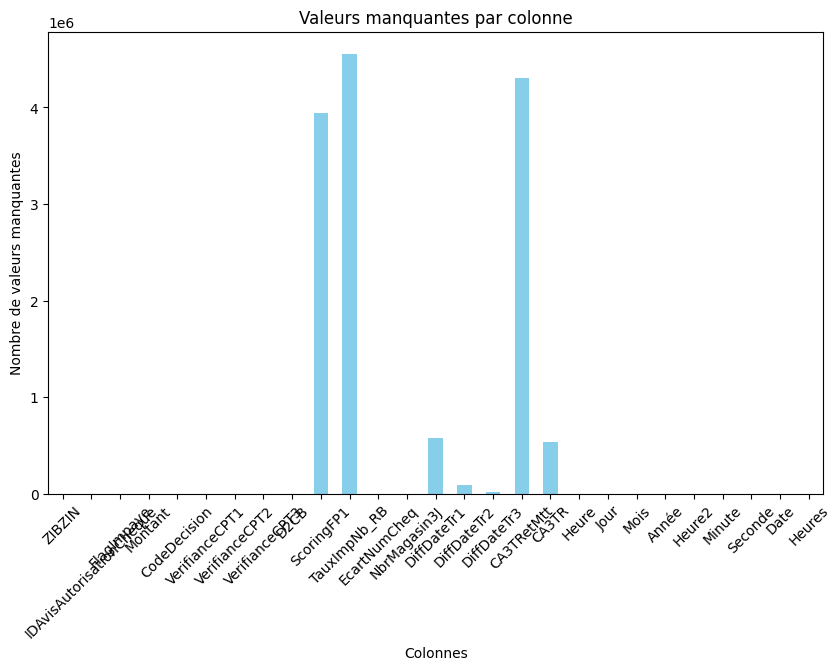

In [30]:
import matplotlib.pyplot as plt

# Tracer un histogramme des valeurs manquantes
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()

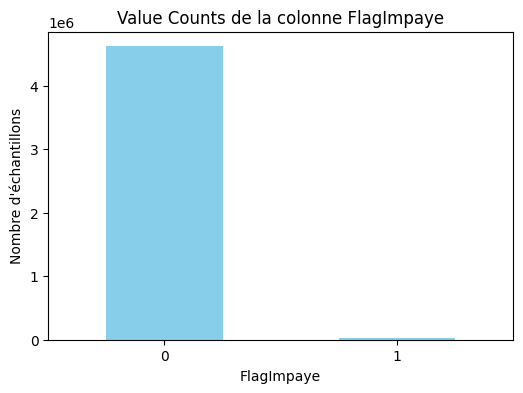

FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64


In [31]:
# Value count de la colonne 'FlagImpaye' après SMOTE
value_counts = df['FlagImpaye'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts de la colonne FlagImpaye')
plt.xlabel('FlagImpaye')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.show()
print(value_counts)

In [32]:
from sklearn.impute import SimpleImputer


cols_to_impute = ['Montant', 'VerifianceCPT1','VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1','TauxImpNb_RB','EcartNumCheq','NbrMagasin3J','DiffDateTr1','DiffDateTr2','DiffDateTr3','CA3TRetMtt','CA3TR']

# Imputer avec la medianne
imputer = SimpleImputer(strategy='median')
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,Date,Heures
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,20.0,0.0,27134,1,2,2017,7,32,14,2017-02-01,07:32:14
1,A013011306908024927155000,78643045,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,1.0,2.0,4.0,4.0,4.0,40.0,0.0,27817,1,2,2017,7,43,37,2017-02-01,07:43:37
2,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28058,1,2,2017,7,47,38,2017-02-01,07:47:38
3,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28128,1,2,2017,7,48,48,2017-02-01,07:48:48
4,A013010041908000125652029,78643048,0,26.90,1,0.0,0.0,0.0,549.0,0.0,0.0,1.0,1.0,4.0,4.0,4.0,40.0,0.0,29607,1,2,2017,8,13,27,2017-02-01,08:13:27


In [33]:
cols_to_impute = ['ZIBZIN', 'IDAvisAutorisationCheque','FlagImpaye', 'CodeDecision']

df[cols_to_impute] = df[cols_to_impute].fillna("inconnu")
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,Date,Heures
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,20.0,0.0,27134,1,2,2017,7,32,14,2017-02-01,07:32:14
1,A013011306908024927155000,78643045,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,1.0,2.0,4.0,4.0,4.0,40.0,0.0,27817,1,2,2017,7,43,37,2017-02-01,07:43:37
2,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28058,1,2,2017,7,47,38,2017-02-01,07:47:38
3,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28128,1,2,2017,7,48,48,2017-02-01,07:48:48
4,A013010041908000125652029,78643048,0,26.90,1,0.0,0.0,0.0,549.0,0.0,0.0,1.0,1.0,4.0,4.0,4.0,40.0,0.0,29607,1,2,2017,8,13,27,2017-02-01,08:13:27


In [34]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
print(missing_values_percentage)

ZIBZIN                      0.0
IDAvisAutorisationCheque    0.0
FlagImpaye                  0.0
Montant                     0.0
CodeDecision                0.0
VerifianceCPT1              0.0
VerifianceCPT2              0.0
VerifianceCPT3              0.0
D2CB                        0.0
ScoringFP1                  0.0
TauxImpNb_RB                0.0
EcartNumCheq                0.0
NbrMagasin3J                0.0
DiffDateTr1                 0.0
DiffDateTr2                 0.0
DiffDateTr3                 0.0
CA3TRetMtt                  0.0
CA3TR                       0.0
Heure                       0.0
Jour                        0.0
Mois                        0.0
Année                       0.0
Heure2                      0.0
Minute                      0.0
Seconde                     0.0
Date                        0.0
Heures                      0.0
dtype: float64


# SAVE DATAFRAME

In [35]:
df.to_csv('data/dataframe_clean.csv', index=False)